# Geoguessr Image Analysis
## Mason Mines: Up-and-Coming Geoguessr Fan
### Created for the Forge Labs Data Science Challenge



**Introduction:** Geoguessr is a game in which players are placed in a random google-street view somewhere across the globe, and are tasked with identifying where they are based on their surroundings. Points are awarded based on the distance between the guessed and actual location (ranging from 0-5000 points, with 5000 representing essentially adjacent guesses). Personally, I enjoy using the game's unique gameplay as a way to learn more about different cultures of the world, and meet a community of people dedicated on doing the same.

**Purpose:** By analyzing street-view data, I hope to gain a greater understanding of global locations and set the groundwork for a much larger project designed to locate a user's location based on regional attributes of an image. At the very least, I hope to gain more information about the locations chosen during games to gain a competitive edge.


**Notes:**
- Code and analysis done in Jupyterlab, as I believe it is a better medium to show my design-process in addition to the code.
- Dependencies are in ```requirements.txt```. Full code on GitHub.

**AI Use Disclaimer**
- I understand Forge Labs' wish to submit code that is entirely our own, and that the use of AI (such as ChatGPT or Copilot) could violate that wish. To honor this, I have throughly marked all usage of AI while creating this project, so that they may be judged fairly. However, AI was used in the hopes to build this project to the best it could be so that it might be the groundwork for a future project.
- At no point was AI used to generate descriptions, introductions/conclusions, editing, or any other non-code writing used to supplement the code. In addition, AI was not used to create ideas or functionality: all ideas for code functionality were mine.

**AI Usage**
- Widespread error-correction (Inserting parts of code returning errors and asking copilot to correct them)
- Generated add_country_data, heatmap, and add_image_data methods with structure from me
- Suggested packages to help achieve idea (os, PIL)

In [ ]:
import pandas as pd

data = pd.read_csv('../data/coords.csv')

# Display first bit of data
print(data.head())

# Optional: Check basic information about the data
print(data.info())


   20.82488495242425  -98.4995168750031
0          -3.451752         -54.563937
1         -23.496464         -47.460542
2         -16.548678         -72.852778
3         -35.010870         140.064397
4         -14.223667         -43.753704
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9999 entries, 0 to 9998
Data columns (total 2 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   20.82488495242425  9999 non-null   float64
 1   -98.4995168750031  9999 non-null   float64
dtypes: float64(2)
memory usage: 156.4 KB
None


### Initial Data Analysis:
**Image Data** 9,999 img files (type: .png)

**Coordinate Data** [2x1] dataframe containing latitude/longitude data (type: float x2)


## Basic Data Cleaning

Right now, only includes adding columns for latitude/longitude data to the dataframe. However, in future, this could include removing extraneous or null values, ordering images by lat/long, etc.


In [ ]:
# Assign proper column names to the DataFrame
data.columns = ['latitude', 'longitude']
data.head()

,latitude,longitude
0,-3.451752,-54.563937
1,-23.496464,-47.460542
2,-16.548678,-72.852778
3,-35.010870,140.064397
4,-14.223667,-43.753704


## Adding Country Data

Ideally, we would be able to map the coordinates to a country location, so that we would be able check if our guess is correct to the location. We can do this through **reverse geo-coding**, or getting a location's info based on it's latitude and longitude. I did this through the package ```reverse_geocode```.


In [ ]:
import reverse_geocode

def get_countries(df : pd.DataFrame = data, limit : int = 5):
    data_slice = df.head(limit)
    for index, row in data_slice.iterrows():
        coord = (row['latitude'], row['longitude'])
        print(reverse_geocode.get(coord))

get_countries(data, 10)

{'country_code': 'BR', 'city': 'Santarém', 'latitude': -2.44306, 'longitude': -54.70833, 'population': 189047, 'state': 'Pará', 'country': 'Brazil'}
{'country_code': 'BR', 'city': 'Sorocaba', 'latitude': -23.50167, 'longitude': -47.45806, 'population': 687357, 'state': 'São Paulo', 'country': 'Brazil'}
{'country_code': 'PE', 'city': 'El Cardo', 'latitude': -16.60315, 'longitude': -72.72736, 'population': 744, 'state': 'Arequipa', 'county': 'Provincia de Camaná', 'country': 'Peru'}
{'country_code': 'AU', 'city': 'Tailem Bend', 'latitude': -35.25226, 'longitude': 139.45546, 'population': 1661, 'state': 'South Australia', 'county': 'Murray Bridge', 'country': 'Australia'}
{'country_code': 'BR', 'city': 'Carinhanha', 'latitude': -14.30472, 'longitude': -43.765, 'population': 11407, 'state': 'Bahia', 'country': 'Brazil'}
{'country_code': 'TR', 'city': 'Aşağıpınarbaşı', 'latitude': 38.03833, 'longitude': 32.60083, 'population': 0, 'state': 'Konya', 'country': 'Turkey'}
{'country_code': 'BW',

We can then create a new column, titled ```country```, for each of the entries in our data. This should return a new dataframe with the country that each coordinate pair lies in.

In [ ]:
def add_country_data(data, limit : int = 5):
    example_data = data.head(limit).copy()

    country_list = []

    # Iterate over the rows of the provided DataFrame to fetch country data
    for index, row in example_data.iterrows():
        coord = (row['latitude'], row['longitude'])  # Extract lat/lon as a tuple
        try:
            country_info = reverse_geocode.get(coord)  # Get country information
            country_list.append(str(country_info['country']))  # Append the country name
        except Exception as e:
            print(f"Error retrieving data for coordinates {coord}: {e}")
            country_list.append(None)  # Append None if there’s an error

    # Add the 'country' column to the DataFrame
    example_data['country'] = country_list

    return example_data


df = add_country_data(data, data.size) #Runs add_country_data to entire data set
print(df.head()) # Prints example of first 5 entries
print(df.info()) # Prints info on new data



    latitude   longitude    country
0  -3.451752  -54.563937     Brazil
1 -23.496464  -47.460542     Brazil
2 -16.548678  -72.852778       Peru
3 -35.010870  140.064397  Australia
4 -14.223667  -43.753704     Brazil
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9999 entries, 0 to 9998
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   latitude   9999 non-null   float64
 1   longitude  9999 non-null   float64
 2   country    9999 non-null   object 
dtypes: float64(2), object(1)
memory usage: 234.5+ KB
None


Note: This could also be done with other reverse-geocoded data (region, approx. city, etc), but the accuracy may be lower, especially when considering not all google street views are in cities or recognized cities.

### Adding image data

Next, we want to have a way to access the images from the data we have. The code below takes in a country name and returns the images within the dataset that are from that country.

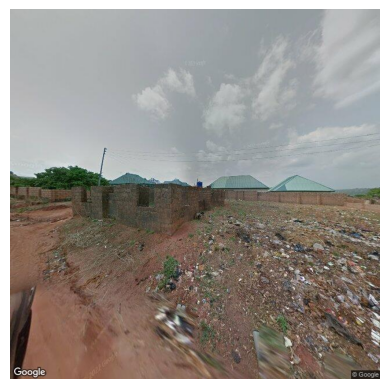

In [ ]:
import matplotlib.pyplot as plt
import os
from PIL import Image

def get_country_images(data, target_country="Peru", limit=5, img_dir="../data/dataset"):
    """
    Finds rows where the `country` column matches `target_country` and displays the corresponding images.

    Args:
        data (DataFrame): A pandas DataFrame with a 'country' column.
        target_country (str): The country to search for.
        limit (int): The maximum number of images to display.
        img_dir (str): The directory where image files are stored.
    """
    # Get the first `limit` indices of matching rows
    matching_indices = data.loc[data['country'] == target_country].index[:limit].tolist()

    if not matching_indices: # if matching_indices is null/empty
        print(f"No images found for country: {target_country}")
        return

    for index in matching_indices:
        img_path = os.path.join(img_dir, f"{index}.png")  #Actually a JPEG, but file type is .png. No idea why.
        if not os.path.exists(img_path):
            print(f"Image not found: {img_path}")
            continue

        try: #Opens to a .jpeg file.
            img = Image.open(img_path)
            # Display the image using matplotlib
            plt.imshow(img)
            plt.axis('off')  # Hide axes
            plt.show()
        except Exception as e:
            print(f"Error displaying image {img_path}: {e}")

# Example usage:
get_country_images(df, "Italy", 1)


## Analysis:

With the previously implemented functionality, we now have the tools to analyze the data and extract meaningful insights.

#### Frequency Analysis:
- Identify countries that appear most frequently in the dataset.
- Determine which countries are absent, potentially highlighting regions without Google Maps Street View coverage, which can be excluded during gameplay.
- Analyze the relative frequencies of different countries to discern patterns or trends.

In [ ]:
#Identify countries that appear the most frequently

countries_frequency = df['country'].value_counts()
print(countries_frequency)


country
Brazil                  1740
Australia               1438
Argentina                905
Russian Federation       796
Mexico                   426
                        ... 
French Guiana              1
Armenia                    1
Andorra                    1
Syrian Arab Republic       1
Dominican Republic         1
Name: count, Length: 104, dtype: int64


In [ ]:
#Identify countries that are absent

from country_list import countries_for_language

def missing_countries() :
    countries = dict(countries_for_language('en'))
    missing_countries = []
    for country in countries:
        if country not in countries_frequency.index:
            missing_countries.append(country)
    for i in range(len(missing_countries)):
        new_country = countries[missing_countries[i]]
        missing_countries[i] = new_country
    return missing_countries

print(missing_countries())

['Afghanistan', 'Åland Islands', 'Albania', 'Algeria', 'American Samoa', 'Andorra', 'Angola', 'Anguilla', 'Antarctica', 'Antigua & Barbuda', 'Argentina', 'Armenia', 'Aruba', 'Australia', 'Austria', 'Azerbaijan', 'Bahamas', 'Bahrain', 'Bangladesh', 'Barbados', 'Belarus', 'Belgium', 'Belize', 'Benin', 'Bermuda', 'Bhutan', 'Bolivia', 'Bosnia & Herzegovina', 'Botswana', 'Bouvet Island', 'Brazil', 'British Indian Ocean Territory', 'British Virgin Islands', 'Brunei', 'Bulgaria', 'Burkina Faso', 'Burundi', 'Cambodia', 'Cameroon', 'Canada', 'Cape Verde', 'Caribbean Netherlands', 'Cayman Islands', 'Central African Republic', 'Chad', 'Chile', 'China', 'Christmas Island', 'Cocos (Keeling) Islands', 'Colombia', 'Comoros', 'Congo - Brazzaville', 'Congo - Kinshasa', 'Cook Islands', 'Costa Rica', 'Côte d’Ivoire', 'Croatia', 'Cuba', 'Curaçao', 'Cyprus', 'Czechia', 'Denmark', 'Djibouti', 'Dominica', 'Dominican Republic', 'Ecuador', 'Egypt', 'El Salvador', 'Equatorial Guinea', 'Eritrea', 'Estonia', 'Esw

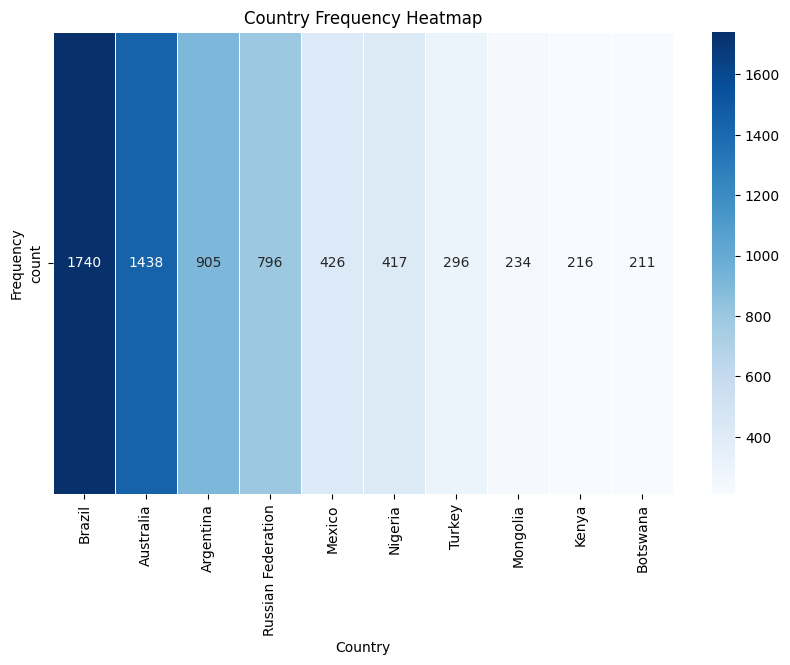

In [ ]:
import seaborn as sns


def graph_heatmap(limit = 5):
    """
    Generates and displays a heatmap representing the frequency of countries in a dataset.

    Args:
        limit (int): The maximum number of most frequent countries to include in the heatmap.
    """
    # Count the frequency of each country
    countries_frequency = df['country'].value_counts().head(limit)

    # Reshape the frequency data to a 2D matrix (for visualization)
    # Create a DataFrame with countries as rows and 'frequency' as values
    frequency_matrix = countries_frequency.to_frame().T  # Make it a single-row DataFrame for heatmap

    # Plot the heatmap
    plt.figure(figsize=(10, 6))
    sns.heatmap(frequency_matrix, annot=True, cmap='Blues', cbar=True, fmt='d', linewidths=0.5)

    # Add labels and title
    plt.xlabel('Country')
    plt.ylabel('Frequency')
    plt.title('Country Frequency Heatmap')

    # Specify the directory where you want to save the file
    save_directory = "../imgs"  # Replace with your desired directory path

    # Check if the directory exists, if not, create it
    if not os.path.exists(save_directory):
        os.makedirs(save_directory)

    # Save the plot to the specified location
    file_path = os.path.join(save_directory, "country_frequency_plot.png")
    plt.savefig(file_path, bbox_inches='tight')

    # Display the plot
    plt.show()

graph_heatmap(10)


## Results
- **Frequent countries (Top 10):** Brazil, Australia, Argentina, Russian Federation, Mexico, Nigeria, Turkey, Mongolia, Kenya, Botswana
- **Countries not represented:** ```['Afghanistan', 'Åland Islands', 'Albania', 'Algeria', 'American Samoa', 'Andorra', 'Angola', 'Anguilla', 'Antarctica', 'Antigua & Barbuda', 'Argentina', 'Armenia', 'Aruba', 'Australia', 'Austria', 'Azerbaijan', 'Bahamas', 'Bahrain', 'Bangladesh', 'Barbados', 'Belarus', 'Belgium', 'Belize', 'Benin', 'Bermuda', 'Bhutan', 'Bolivia', 'Bosnia & Herzegovina', 'Botswana', 'Bouvet Island', 'Brazil', 'British Indian Ocean Territory', 'British Virgin Islands', 'Brunei', 'Bulgaria', 'Burkina Faso', 'Burundi', 'Cambodia', 'Cameroon', 'Canada', 'Cape Verde', 'Caribbean Netherlands', 'Cayman Islands', 'Central African Republic', 'Chad', 'Chile', 'China', 'Christmas Island', 'Cocos (Keeling) Islands', 'Colombia', 'Comoros', 'Congo - Brazzaville', 'Congo - Kinshasa', 'Cook Islands', 'Costa Rica', 'Côte d’Ivoire', 'Croatia', 'Cuba', 'Curaçao', 'Cyprus', 'Czechia', 'Denmark', 'Djibouti', 'Dominica', 'Dominican Republic', 'Ecuador', 'Egypt', 'El Salvador', 'Equatorial Guinea', 'Eritrea', 'Estonia', 'Eswatini', 'Ethiopia', 'Falkland Islands', 'Faroe Islands', 'Fiji', 'Finland', 'France', 'French Guiana', 'French Polynesia', 'French Southern Territories', 'Gabon', 'Gambia', 'Georgia', 'Germany', 'Ghana', 'Gibraltar', 'Greece', 'Greenland', 'Grenada', 'Guadeloupe', 'Guam', 'Guatemala', 'Guernsey', 'Guinea', 'Guinea-Bissau', 'Guyana', 'Haiti', 'Heard & McDonald Islands', 'Honduras', 'Hong Kong SAR China', 'Hungary', 'Iceland', 'India', 'Indonesia', 'Iran', 'Iraq', 'Ireland', 'Isle of Man', 'Israel', 'Italy', 'Jamaica', 'Japan', 'Jersey', 'Jordan', 'Kazakhstan', 'Kenya', 'Kiribati', 'Kuwait', 'Kyrgyzstan', 'Laos', 'Latvia', 'Lebanon', 'Lesotho', 'Liberia', 'Libya', 'Liechtenstein', 'Lithuania', 'Luxembourg', 'Macao SAR China', 'Madagascar', 'Malawi', 'Malaysia', 'Maldives', 'Mali', 'Malta', 'Marshall Islands', 'Martinique', 'Mauritania', 'Mauritius', 'Mayotte', 'Mexico', 'Micronesia', 'Moldova', 'Monaco', 'Mongolia', 'Montenegro', 'Montserrat', 'Morocco', 'Mozambique', 'Myanmar (Burma)', 'Namibia', 'Nauru', 'Nepal', 'Netherlands', 'New Caledonia', 'New Zealand', 'Nicaragua', 'Niger', 'Nigeria', 'Niue', 'Norfolk Island', 'North Korea', 'North Macedonia', 'Northern Mariana Islands', 'Norway', 'Oman', 'Pakistan', 'Palau', 'Palestinian Territories', 'Panama', 'Papua New Guinea', 'Paraguay', 'Peru', 'Philippines', 'Pitcairn Islands', 'Poland', 'Portugal', 'Puerto Rico', 'Qatar', 'Réunion', 'Romania', 'Russia', 'Rwanda', 'Samoa', 'San Marino', 'São Tomé & Príncipe', 'Saudi Arabia', 'Senegal', 'Serbia', 'Seychelles', 'Sierra Leone', 'Singapore', 'Sint Maarten', 'Slovakia', 'Slovenia', 'Solomon Islands', 'Somalia', 'South Africa', 'South Georgia & South Sandwich Islands', 'South Korea', 'South Sudan', 'Spain', 'Sri Lanka', 'St. Barthélemy', 'St. Helena', 'St. Kitts & Nevis', 'St. Lucia', 'St. Martin', 'St. Pierre & Miquelon', 'St. Vincent & Grenadines', 'Sudan', 'Suriname', 'Svalbard & Jan Mayen', 'Sweden', 'Switzerland', 'Syria', 'Taiwan', 'Tajikistan', 'Tanzania', 'Thailand', 'Timor-Leste', 'Togo', 'Tokelau', 'Tonga', 'Trinidad & Tobago', 'Tunisia', 'Turkey', 'Turkmenistan', 'Turks & Caicos Islands', 'Tuvalu', 'U.S. Outlying Islands', 'U.S. Virgin Islands', 'Uganda', 'Ukraine', 'United Arab Emirates', 'United Kingdom', 'United States', 'Uruguay', 'Uzbekistan', 'Vanuatu', 'Vatican City', 'Venezuela', 'Vietnam', 'Wallis & Futuna', 'Western Sahara', 'Yemen', 'Zambia', 'Zimbabwe']```
- **Heatmap:** ![Heatmap](https://github.com/MasonMines2006/forge-labs-DS-challenge/blob/main/imgs/country_frequency_plot.png?raw=1)

## Future Analysis and Image Detection

The key to GeoGuessr is for a player to be able to detect features of their environment (liscense plates, architecture, camera quality, telephone poles, etc), connect them with previous information on where these features are located across the world, and use them to make a guess on where they are. Eventually, the purpose of this dataset could be to replicate this thought-process with advanced image detection, incorporating machine learning techniques to gather information and make location guesses.
- This could have huge implications outside of GeoGuessr, including disaster response, missing person searches, or environmental monitoring.
- This could be done with a more advanced image-detection neural network, either pretrained (Like ResNet, EfficientNet, or CLIP for feature embeddings), or a custom one suited better for these specific needs.

## Potential Improvements
- **Specialized dataset:** This studies' data analysis relies on a sample size of locations that would be accurate in variety and frequency to the locations quizzed on during gameplay. The dataset used in the study was not designed for this purpose, and therefore be biased towards or away from certain countries' data.
    - This became evident when revealing how many countries the dataset failed to cover. This could be fixed be improving the dataset to be better suited for Geoguessr-specific analysis.
    - For instance, it could be done by scraping random street-view points, as well as their lat/long data, from the Google street-view API.
    - There also exists a specialized kaggle data set that I came across located here: [Visit Geoguessr Dataset](https://www.kaggle.com/datasets/ubitquitin/geolocation-geoguessr-images-50k). However, this data did not have location data, making it impossible to locate which country each image was from.
- **Use of other frameworks** The analysis portion of this study could have been optimized in a different framework, especially if larger datasets or machine learning tecnhiques were introduced.
    - I know Tableaux can create some beautiful geo-spatial graphs, especially for heat-maps. I've done this in the past with US-data, but would be interested to apply it to this context with global data.
    - The data analysis could have been sped up in R, but I stayed away from using it for simplicity.